In [ ]:
# assistir o video de introdução para descrever as tarefas

## Carregamento das bibliotecas

In [1]:
#pip install spacy

In [2]:
#pip install scispacy

In [2]:
#pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.5/en_core_sci_md-0.2.5.tar.gz

In [1]:
import numpy as np
import zipfile
import pandas as pd
import glob
import json
import seaborn as sns
import spacy
import nltk
import scispacy
from matplotlib import pyplot as plt
import en_core_sci_md 

## Carregamento da base de dados - 
### não sei se preciso disso. no caso eu ja posso enviar descompactada a base

In [34]:
#dirBD = './CORD-19-research-challenge.zip'
#baseDados=zipfile.ZipFile(file = dirBD, mode = 'r') #modo leitura
#baseDados.extractall('./')
#baseDados.close()


In [2]:
### dicionário
dicArtigos = {'paper_id':[], 'title':[],
             'abstract':[], 'text':[]}
type(dicArtigos)

dict

In [3]:
## transformando em dataframe
dfArtigos = pd.DataFrame.from_dict(dicArtigos)
type(dfArtigos)

pandas.core.frame.DataFrame

In [4]:
## com o auxilio da blibioteca de leitura de diretorio será
## lido o arquivo json, coletado o nome dos artigos e preennchido

listaArtigos = glob.glob(f'{"./"}//**/*.json', recursive= True) 

In [5]:
# total de artigos percorrido
len(listaArtigos)

29315

In [6]:
## funcao que vai percorrer todos os aquivos e pupilar o DF
def funcao_dfArtigos(listaArtigos, df):
    for nomeArtigo in listaArtigos:
        linhaDF={'paper_id':None, 'title':None,
                 'abstract':None, 'text':None}
        
        with open(nomeArtigo) as json_data:
            if nomeArtigo=='./sample_data/anscombe.json': #se encontrar esse arq ele não le e continua
                continue
        
            dados = json.load(json_data)
            
            linhaDF['paper_id']=dados['paper_id'].strip() #retirando os espaços no inicio e no fim
            linhaDF['title']=dados['metadata']['title'] # há uma tag a mais mostrar a estrutura da base
            # extração palavra por palavra do abstract
            listaAbstract = [abstract['text'] for abstract in dados['abstract']]
            abstract = '\n'.join(listaAbstract)# unindo
            linhaDF['abstract']=abstract.strip()
            # extração palavra por palavra do conteudo
            listaTexto = [text['text'] for text in dados['body_text']] # unindo
            texto = '\n'.join(listaTexto)
            linhaDF['text']=texto.strip()
            
            df = df.append(linhaDF, ignore_index = True)
        
    return df
    

In [7]:
## agora ocorrerá a extração da base e insersão dos dados no df
dfArtigos = funcao_dfArtigos(listaArtigos, dfArtigos)

In [8]:
dfArtigos.shape

(29315, 4)

In [9]:
dfArtigos.head()

,paper_id,title,abstract,text
0,c79f73c69108533aa867037948f63229d877e9fd,,,Fatty acids are covalently attached to many me...
1,90d1d04a22ec4e9f4e1e0d63053a99784ca489d6,Equine sarcoid: In situ demonstration of matri...,Sarcoids are the most prevalent equine skin tu...,Sarcoids are the most common equine skin tumou...
2,0a9145664ca5e8dd902b5f01f70a53e638ab52a9,Evaluation of a single-tube fluorogenic RT-PCR...,Bovine respiratory syncytial virus (BRSV) caus...,"Bovine respiratory syncytial virus (BRSV), a P..."
3,4564577ec73f757cb36aae29fd4c867482f84dee,Evidence and future potential of mobile phone ...,Global health threats such as the recent Ebola...,Novel sources of data coupled with new data mi...
4,bc9e8da285ed2401fb1351f9edd7891385524c31,Brown,This chapter describes how the impact of psych...,"This is an adaptive response in one sense, pro..."


In [12]:
# verificando um artigo
len(dfArtigos['paper_id'][0])

40

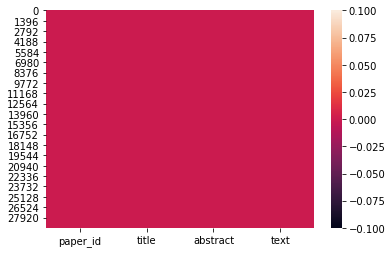

In [10]:
## preprocessamento - valores faltantes na base de dados
## com o auxilio da lib seaborn será gerado o mapa de calor do DF
## exibindo os valores faltantes
sns.heatmap(dfArtigos.isnull());

In [13]:
# verificando se há algum artigo sem o id
# utiliza-se o '' pois a base ja foi tratada na quando se usou 
# a funcao .strip(), ou seja já foi retirado o espaço do inicio e do fim do artigo
# no mapa de calor o espaço é visto como um caractere, dessa forma os artigo que tiverem
# apenas o espaço em uma das colunas não será identificado, dessa forma é necessário tratar com o 
# método a seguir.
len(dfArtigos[dfArtigos['paper_id']==''])

0

In [18]:
# verificando se há algum artigo sem o título
len(dfArtigos[dfArtigos['title']==''])

0

In [21]:
# verificando se há algum artigo sem o abstract
len(dfArtigos[dfArtigos['abstract']==''])

0

In [16]:
# verificando se há algum artigo sem o corpo do artigo
len(dfArtigos[dfArtigos['text']==''])

0

In [20]:
## apagando os artigos que faltam informações
dfArtigos = dfArtigos[dfArtigos['title'] != ''] # deixando somente os artigos que tem titulo
dfArtigos = dfArtigos[dfArtigos['abstract'] != ''] # deixando somente os artigos que tem abstract

In [25]:

dfArtigos.shape

(20343, 4)

In [26]:
# remoção de artigos duplicados, o inplace = true remove e atualiza o df
dfArtigos.drop_duplicates(['abstract','text','title'], inplace=True)

In [27]:
dfArtigos.shape

(20211, 4)

In [ ]:
# retirando uma amostra da base de dados